In [2]:
import subprocess
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

def run_experiment(model_param_file, train_adj_feature_file, fractionlabelsattack):
    print(f"Running experiment")

    command = [
        "python", "main.py",
        '--model_param_file', model_param_file,
        '--train_adj_feature_file', train_adj_feature_file,
        '--nlabel' , str(fractionlabelsattack)
    ]

    result = subprocess.run(command, capture_output=True, text=True, encoding='utf-8')

    output = result.stdout
    match = re.search(r"AUC:\s*([\d.]+).*AP:\s*([\d.]+)", output, re.DOTALL)
    if match:
        auc = float(match.group(1))
        ap = float(match.group(2))
    else:
        auc, ap = None, None

    return auc, ap


The config for the experiments are as follows:

Attacker has access to 10 % of node labels and all node features. We take models trained with varying levels of edge_drop_rate from 0.05 to 0.55

In [2]:
import os

directory_path = "E:\project_course\DPAR\saved_models"

train_adj_feature_file = "matricx.npz"
fractionlabelsattack = 0.1
results = []
for filename in os.listdir(directory_path):
    file_path = os.path.join(directory_path, filename)
    print(f"Processing file: {file_path}")
    auc, ap = run_experiment(file_path, train_adj_feature_file, fractionlabelsattack)
    print(f"File: {filename} -> AUC: {auc}, AP: {ap}")
    results.append([filename, auc, ap])

<>:3: SyntaxWarning: invalid escape sequence '\p'
<>:3: SyntaxWarning: invalid escape sequence '\p'
C:\Users\skabh\AppData\Local\Temp\ipykernel_15432\1350162053.py:3: SyntaxWarning: invalid escape sequence '\p'
  directory_path = "E:\project_course\DPAR\saved_models"


Processing file: E:\project_course\DPAR\saved_models\model_cora_ml_dpsgd_False_sampling100.0_eps0pct,drop_randomedgesTrue0.05.npz
Running experiment
File: model_cora_ml_dpsgd_False_sampling100.0_eps0pct,drop_randomedgesTrue0.05.npz -> AUC: 0.809667, AP: 0.82376
Processing file: E:\project_course\DPAR\saved_models\model_cora_ml_dpsgd_False_sampling100.0_eps0pct,drop_randomedgesTrue0.15.npz
Running experiment
File: model_cora_ml_dpsgd_False_sampling100.0_eps0pct,drop_randomedgesTrue0.15.npz -> AUC: 0.799861, AP: 0.77921
Processing file: E:\project_course\DPAR\saved_models\model_cora_ml_dpsgd_False_sampling100.0_eps0pct,drop_randomedgesTrue0.25.npz
Running experiment
File: model_cora_ml_dpsgd_False_sampling100.0_eps0pct,drop_randomedgesTrue0.25.npz -> AUC: 0.819044, AP: 0.829888
Processing file: E:\project_course\DPAR\saved_models\model_cora_ml_dpsgd_False_sampling100.0_eps0pct,drop_randomedgesTrue0.35.npz
Running experiment
File: model_cora_ml_dpsgd_False_sampling100.0_eps0pct,drop_rando

Text(0.5, 1.0, 'Influence of edges dropped in training adjacency matrix on attack scores')

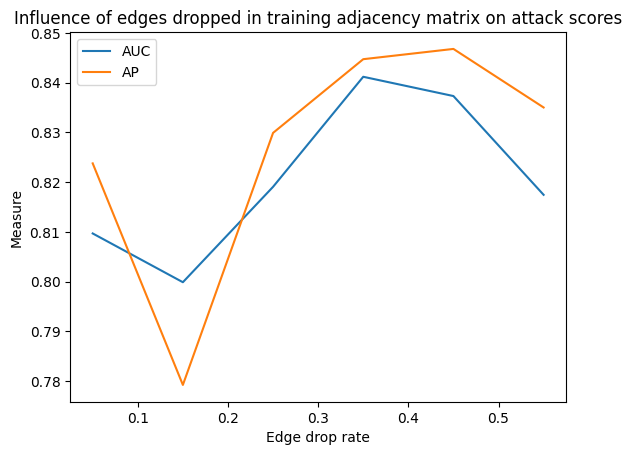

In [17]:
import matplotlib.pyplot as plt

drop_rates =[0.05, 0.15, 0.25, 0.35, 0.45, 0.55]

result = pd.DataFrame(results, columns=['file', 'auc', 'ap'])

plt.plot(drop_rates, result['auc'], label = "AUC")
plt.plot(drop_rates, result['ap'], label = "AP")
plt.legend()
plt.xlabel("Edge drop rate")
plt.ylabel('Measure')
plt.title("Influence of edges dropped in training adjacency matrix on attack scores")

Trying the same experiment but attacker has access to 60% of training node labels

In [3]:
import os

directory_path = "E:/project_course/DPAR/saved_models"

train_adj_feature_file = "matricx.npz"
fractionlabelsattack = 0.6
results_60pct = []
for filename in os.listdir(directory_path):
    file_path = os.path.join(directory_path, filename)
    print(f"Processing file: {file_path}")
    auc, ap = run_experiment(file_path, train_adj_feature_file, fractionlabelsattack)
    print(f"File: {filename} -> AUC: {auc}, AP: {ap}")
    results_60pct.append([filename, auc, ap])

Processing file: E:/project_course/DPAR/saved_models\model_cora_ml_dpsgd_False_sampling100.0_eps0pct,drop_randomedgesTrue0.05.npz
Running experiment
File: model_cora_ml_dpsgd_False_sampling100.0_eps0pct,drop_randomedgesTrue0.05.npz -> AUC: 0.952066, AP: 0.959373
Processing file: E:/project_course/DPAR/saved_models\model_cora_ml_dpsgd_False_sampling100.0_eps0pct,drop_randomedgesTrue0.15.npz
Running experiment
File: model_cora_ml_dpsgd_False_sampling100.0_eps0pct,drop_randomedgesTrue0.15.npz -> AUC: 0.952199, AP: 0.946395
Processing file: E:/project_course/DPAR/saved_models\model_cora_ml_dpsgd_False_sampling100.0_eps0pct,drop_randomedgesTrue0.25.npz
Running experiment
File: model_cora_ml_dpsgd_False_sampling100.0_eps0pct,drop_randomedgesTrue0.25.npz -> AUC: 0.957975, AP: 0.964136
Processing file: E:/project_course/DPAR/saved_models\model_cora_ml_dpsgd_False_sampling100.0_eps0pct,drop_randomedgesTrue0.35.npz
Running experiment
File: model_cora_ml_dpsgd_False_sampling100.0_eps0pct,drop_ran

Text(0.5, 1.0, 'Influence of edges dropped in training adjacency matrix on attack scores')

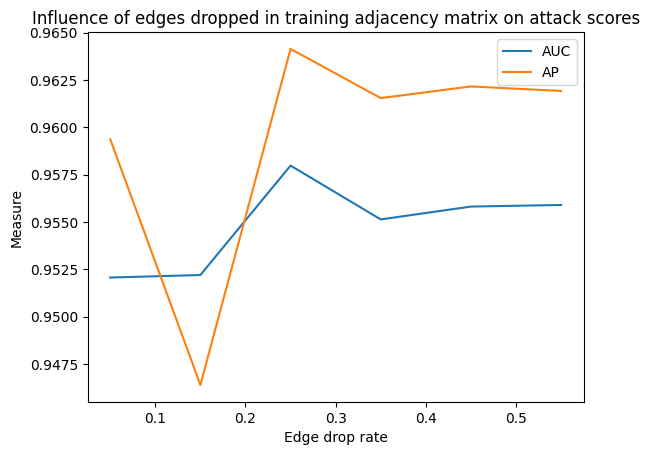

In [4]:
import matplotlib.pyplot as plt

drop_rates =[0.05, 0.15, 0.25, 0.35, 0.45, 0.55]

results_60pct = pd.DataFrame(results_60pct, columns=['file', 'auc', 'ap'])

plt.plot(drop_rates, results_60pct['auc'], label = "AUC")
plt.plot(drop_rates, results_60pct['ap'], label = "AP")
plt.legend()
plt.xlabel("Edge drop rate")
plt.ylabel('Measure')
plt.title("Influence of edges dropped in training adjacency matrix on attack scores")

Running the same two experiments on pubmed

In [2]:
import os

directory_path = "pubmed_models\saved_models_pubmed"

train_adj_feature_file = "pubmed_models\train_adj&train_attrpubmed.npz"
fractionlabelsattack = 0.1
result_pubmed = []
for filename in os.listdir(directory_path):
    file_path = os.path.join(directory_path, filename)
    print(f"Processing file: {file_path}")
    auc, ap = run_experiment(file_path, train_adj_feature_file, fractionlabelsattack)
    print(f"File: {filename} -> AUC: {auc}, AP: {ap}")
    result_pubmed.append([filename, auc, ap])

Processing file: pubmed_models\saved_models_pubmed\model_pubmed_dpsgd_False_sampling100.0_eps0pct,drop_randomedgesTrue0.05.npz


<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
C:\Users\skabh\AppData\Local\Temp\ipykernel_12076\3392910928.py:3: SyntaxWarning: invalid escape sequence '\s'
  directory_path = "pubmed_models\saved_models_pubmed"
C:\Users\skabh\AppData\Local\Temp\ipykernel_12076\3392910928.py:3: SyntaxWarning: invalid escape sequence '\s'
  directory_path = "pubmed_models\saved_models_pubmed"


NameError: name 'run_experiment' is not defined

In [ ]:
result_pubmed = pd.DataFrame(result_pubmed, columns=['file', 'auc', 'ap'])

plt.plot(drop_rates, result_pubmed['auc'], label = "AUC")
plt.plot(drop_rates, result_pubmed['ap'], label = "AP")
plt.legend()
plt.xlabel("Edge drop rate")
plt.ylabel('Measure')
plt.title("Influence of edges dropped in training adjacency matrix on attack scores")